# <center> Research of HR agency data using statistical tests in the context of EDA.

## Problem statement

*HR*-the agency studies trends in the labor market in *IT*. The company wants to conduct a study based on data on salaries in the field of *Data Science* for 2020-2022 and get some conclusions.

*HR*-The agency wants to answer the following questions regarding salary data in the field of *Data Science*.

**Basic research:**

* Question-1. Is there an increase in salaries of *Data Scientist* specialists for each year?
* Question-2. How do the salaries of *Data Scientist* and *Data Engineer* compare in 2022?
* Question-3. How do the salaries of *Data Scientist* and *Data Engineer* specialists in companies of various sizes compare?
* Question-4. Is there a connection between the presence of positions *Data Scientist* and *Data Engineer* and the size of the company?

**Additional research:**

* Question - 5. Is there a dependence of the salary level of a specialist *Data Scientist* depending on work experience (position held)?
* Question - 6. Is there a dependence of wages on the type of remoteness of work?


Each question must be answered with a significance level of $\alpha=0.05$.

Data on salaries of Data Scientist with indication of characteristics will help us to answer these questions.

### Description of columns.
<br>
<table>
<tbody>
<tr style="background-color: #88cdb2; vertical-align: middle; text-transform: uppercase; color: #062425; font-weight: bold;">
<td>Column name</td>
<td>Description</td>
</tr>
<tr>
<td style="width: 25%;"><span class="code-blue">work_year</span></td>
<td style="width: 75%;">The year in which the salary was paid.</td>
</tr>
<tr>
<td><span class="code-blue">experience_level</span></td>
<td>Work experience in this position for a year with the following possible values:
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><em>EN — Entry-level/Junior;</em></li>
<li><em>MI — Mid-level/Intermediate;</em></li>
<li><em>SE — Senior-level/Expert;</em></li>
<li><em>EX — Executive-level/Director.</em></li>
</ul>
</ul>
</td>
</tr>
<tr>
<td><span class="code-blue">employment_type</span></td>
<td>Type of employment for this role:
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><em>PT</em> — part-time;</li>
<li><em>FT</em> — full-time;</li>
<li><em>CT</em> — the contract;</li>
<li><em>FL</em> — freelance.</li>
</ul>
</ul>
</td>
</tr>
<tr>
<td><span class="code-blue">job_title</span></td>
<td>The role in which the applicant worked for a year.</td>
</tr>
<tr>
<td><span class="code-blue">salary</span></td>
<td>The total gross amount of wages paid.</td>
</tr>
<tr>
<td><span class="code-blue">salary_currency</span></td>
<td>The currency of the salary paid in the form of a currency code. <em>ISO</em> 4217.</td>
</tr>
<tr>
<td><span class="code-blue">salary_in_usd</span></td>
<td>Salary in US dollars (the exchange rate divided by the average value of the US dollar for the corresponding year through <em>fxdata.foorilla.com</em>).</td>
</tr>
<tr>
<td><span class="code-blue">employee_residence</span></td>
<td>The main country of residence of the employee during the working year in the form of a country code. <em>ISO</em> 3166.</td>
</tr>
<tr>
<td><span class="code-blue">remote_ratio</span></td>
<td>The total amount of work performed remotely. Possible values:
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li>0 — there is no remote work (менее 20 %);</li>
<li>50 — partially remote work;</li>
<li>100 — completely remote work (более 80 %).</li>
</ul>
</ul>
</td>
</tr>
<tr>
<td><span class="code-blue">company_location</span></td>
<td>Country of the main office of the employer or a branch under the contract in the form of a country code <em>ISO</em> 3166.</td>
</tr>
<tr>
<td><span class="code-blue">company_size</span></td>
<td>Average number of people who worked for the company during the year:
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><em>S</em> — less than 50 employees (small company);</li>
<li><em>M</em> — from 50 to 250 employees (average company);</li>
<li><em>L</em> — more than 250 employees (large company).</li>
</ul>
</ul>
</td>
</tr>
</tbody>
</table>

Original dataset: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

# I. Data loading and processing

### Loading data

In [256]:
# downloading the necessary libraries
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

import wget
# we make visual adjustment of graphs
sns.set_theme("notebook")
sns.set_palette("Set2")

The data was copied to Google Drive, they are available at [ссылке](https://drive.google.com/file/d/1b_NEk_nrBLhYxBo-DI-TVLRsTIOYvk-r/view).

In [257]:
# Loading the dataset.
df_salaries = pd.read_csv('data/ds_salaries.csv')

In [258]:
# Delete the unnecessary column "Unnamed: 0".
df_salaries.drop('Unnamed: 0', axis=1, inplace=True)

df_salaries.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


In [259]:
# setting the significance level
alpha = 0.05
print('Significance level "alpha" = {:.2f}'.format(alpha))

Significance level "alpha" = 0.05


###  Descriptive data analysis

In [260]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


There are 607 records in the dataset, without missing values.

### Omissions and duplicates, clearing.


Let's check the data for complete duplicates:

In [261]:
print('Number of duplicates: {}'
      .format(df_salaries[df_salaries.duplicated()].shape[0])
      )

# Removing duplicates:
df_salaries = df_salaries.drop_duplicates()
print('Table size after removing duplicates {}'
      .format(df_salaries.shape[0])
      )

Number of duplicates: 42
Table size after removing duplicates 565


### Uninformative signs.

Consider the salary data from the table *df_salaries*.

In [262]:
df_salaries[['salary', 'salary_currency',
             'salary_in_usd', 'work_year']].head(5)

,salary,salary_currency,salary_in_usd,work_year
0,70000,EUR,79833,2020
1,260000,USD,260000,2020
2,85000,GBP,109024,2020
3,20000,USD,20000,2020
4,150000,USD,150000,2020


We don't need the *salary* and *salary_currency* columns in the table, because there is a *salary_in_usd* column that shows the salary level in dollars for the year.

Create a new column **monthly_salary**, it will show the employee's salary level per month. The extra columns *salary* and *salary_currency*, *salary_in_usd* will be deleted.

In [263]:
# Создаём новый столбец monthly_salary.
df_salaries['monthly_salary'] = df_salaries['salary_in_usd']/12

# Приводим столбец к типу данных int.
df_salaries['monthly_salary'] = df_salaries['monthly_salary'].astype('int64')

# Удаляем столбцы salary и salary_currency, salary_in_usd.
df_salaries.drop(['salary', 'salary_currency',
                 'salary_in_usd'], axis=1, inplace=True)

### Types of features.

Classify the signs into numeric and discrete.

In [264]:
df_salaries.describe()

,work_year,remote_ratio,monthly_salary
count,565.000000,565.000000,565.000000
mean,2021.364602,69.911504,9217.153982
std,0.698138,40.900666,6023.448732
min,2020.000000,0.000000,238.000000
25%,2021.000000,50.000000,5063.000000
50%,2021.000000,100.000000,8333.000000
75%,2022.000000,100.000000,12500.000000
max,2022.000000,100.000000,50000.000000


In [265]:
df_salaries.describe(include='object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,565,565,565,565,565,565
unique,4,4,50,57,50,3
top,SE,FT,Data Scientist,US,US,M
freq,243,546,130,295,318,290


Numerical features include *work_ua*, *remote_ratio*, *monthly_salary*. The rest are categorical.

### Basic statistical characteristics

The two tables above show the general statistical characteristics of the features:
* **Numerical features** are characterized by an average value, quantiles, minimum and maximum values.
* **Categorical features** show how many unique values the string is *unique*, what is the most popular value *top*, as well as how often it occurs *freq*.

### Data Conversion

1. Conversion of the *job_title* attribute.

It can be seen from the table above that the *job_title* attribute has 50 different job titles, let's look at them.

In [266]:
df_salaries[['job_title']].value_counts().head(15).to_frame(name='Count')

,Count
job_title,
Data Scientist,130
Data Engineer,121
Data Analyst,82
Machine Learning Engineer,39
Research Scientist,16
Data Science Manager,12
Data Architect,11
Big Data Engineer,8
Machine Learning Scientist,8


The top 15 types of jobs are *Data Scientist*, *Data Engineer*, *Data Analyst*, etc. makes up the bulk. Rename the other names of professions as *other*.

In [267]:
# Преобразование признака 'job_title'.
# Создадим список топ-15 профессий
data = df_salaries[['job_title']].value_counts().head(15)
data = list(data.index)
top_15_prof = []
for i in range(len(data)):
    top_15_prof.append(str(*data[i]))

# Переименуем остальные в 'other' не входящие в Top-15 профессий.
df_salaries['job_title'] = df_salaries['job_title'].apply(
    lambda x: x if x in top_15_prof else 'other')

2. Conversion of the attribute *employee_residence* and *company_location*.

*employee_residence* there are 57 different names, and *company_location* 50 we will reduce them to 9, the rest we will call *other*.

Converting the *employee_residence attribute*:

In [268]:
# Conversion of the 'employee_residence' attribute.
# Let's create a list of the top 9 countries of residence.
data = df_salaries[['employee_residence']].value_counts().head(9)
data = list(data.index)
top_9_er = []
for i in range(len(data)):
    top_9_er.append(str(*data[i]))
# print(top_9_er)

# Rename the rest to 'other' not included in the Top-9 countries of residence.
df_salaries['employee_residence'] = df_salaries['employee_residence'].apply(
    lambda x: x if x in top_9_er else 'other')

Converting the *company_location attribute*:

In [269]:
# Conversion of the 'company_location' attribute.
# Let's create a list of the top 9 countries of the company's main office.
data = df_salaries[['company_location']].value_counts().head(9)
data = list(data.index)
top_9_cl = []
for i in range(len(data)):
    top_9_cl.append(str(*data[i]))

# Rename the rest to 'other' not included in the Top-9 countries of residence.
df_salaries['company_location'] = df_salaries['company_location'].apply(
    lambda x: x if x in top_9_cl else 'other')

In [270]:
df_salaries.describe(include='object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,565,565,565,565,565,565
unique,4,4,16,10,10,3
top,SE,FT,Data Scientist,US,US,M
freq,243,546,130,295,318,290


## II. Intelligence Data Analysis

### II.1 Visual data analysis

#### Basic data analysis for each feature

General level of **Salary** Data Scientist

In [271]:
salary_agg = df_salaries['monthly_salary'].describe().round(2).to_frame()
salary_agg.columns = ["The amount of Data Scientist's salary per month"]
salary_agg

,The amount of Data Scientist's salary per month
count,565.00
mean,9217.15
std,6023.45
min,238.00
25%,5063.00
50%,8333.00
75%,12500.00
max,50000.00


Let's build a graph for data visualization.

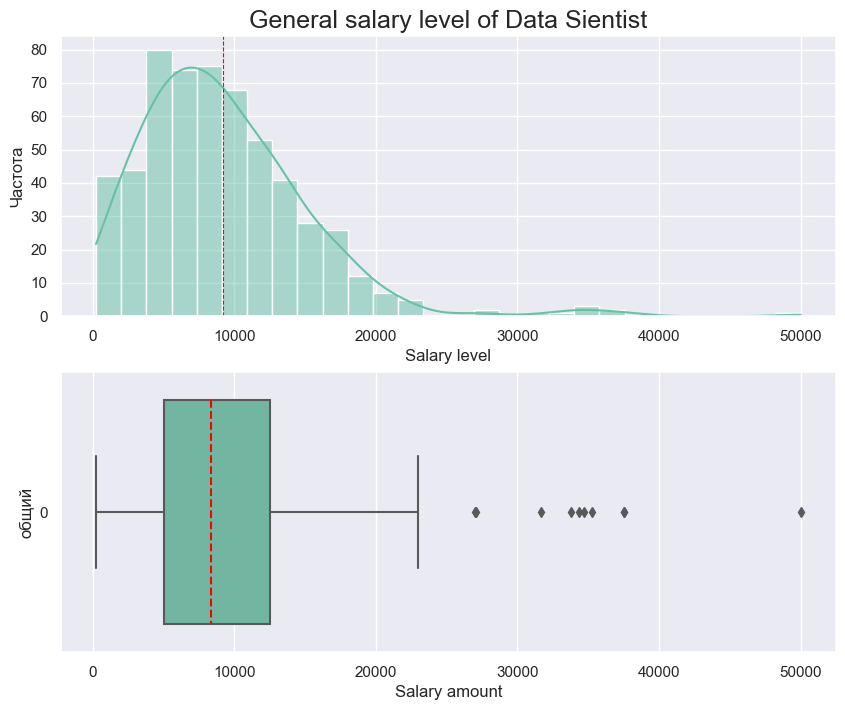

In [272]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(df_salaries['monthly_salary'], kde=True, ax=axes[0])
axes[0].set(xlabel='Salary level', ylabel='Frecuency')
axes[0].set_title('General salary level of Data Sientist', size=18)
axes[0].axvline(df_salaries['monthly_salary'].mean(), color='red',
                linestyle='--', linewidth=0.8)

sns.boxplot(df_salaries['monthly_salary'], ax=axes[1], orient='h',
            medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Salary amount', ylabel='in total')

plt.show()

The graph shows that the average salary level varies from 0 to 24,000 dollars per month. The graph has the form of a normal distribution with right-sided asymmetry. The interquartile salary range between the 25th and 75th quantile ranges from $7,500 to $12,000. 

On the first graph, the red line shows the average value, on the second the median value. They are different from each other, which indicates some deviation from the normal distribution, this will be checked further on tests.

**What factors affect wages**❓

1. A common feature is **work_year**.

In [273]:
# Creating a year-by-year table with the number of professions in our DataFrame.
data = df_salaries['work_year'].value_counts().to_frame()
data.columns = ['Number of professions']
data

,Number of professions
2022,278
2021,215
2020,72


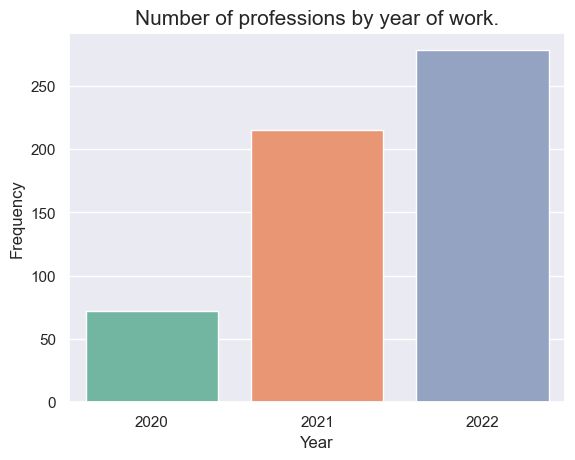

In [274]:
ax = sns.barplot(y=data['Number of professions'], x=data.index)
ax.set(xlabel='Year', ylabel='Frequency')
ax.set_title('Number of professions by year of work.', size=15)
plt.show()

Построим график ежегодного рост зарплат у специалистов Data Scientist и узнаем если зависмость уровня зарплаты от года работы.

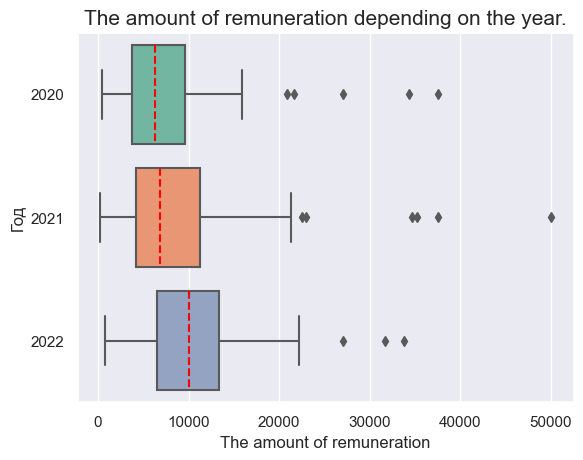

In [275]:
# Let's build box diagrams by year.
ax = sns.boxplot(df_salaries,  x='monthly_salary', y='work_year', orient='h',
                 medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='The amount of remuneration', ylabel='year')
plt.title('The amount of remuneration depending on the year.', size=15)
plt.show()

In [276]:
# Salary table depending on the year of work.
table = df_salaries.groupby('work_year')[
    'monthly_salary'].describe().round()
print('The amount of salary depending on the year of work.')
table

The amount of salary depending on the year of work.


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,7984.0,6903.0,475.0,3810.0,6295.0,9627.0,37500.0
2021,215.0,8285.0,6692.0,238.0,4166.0,6877.0,11250.0,50000.0
2022,278.0,10257.0,4991.0,833.0,6565.0,10000.0,13333.0,33750.0


**Conclusion:**
* the average salary increases from year to year;
* the level of *std* standard deviation decreases, which means that the salary value has a more stable and stable position;
* *work_year* affects the salary level of a Data Scientist specialist. 

In order to check whether these differences are statistically significant, we will conduct statistical testing in the next section.

2. General feature **remote_ratio** (percentage of remote work).
Possible values:
    - 0 — no remote work (less than 20%);
    - 50 — partially remote work;
    - 100 — completely remote work (more than 80%).

In [277]:
# Let's build a Data Frame of the remote work attribute.
data = df_salaries['remote_ratio'].value_counts().to_frame()
data.sort_index(inplace=True)
data.columns = ['frequency']
data['share in %'] = round((data['frequency']/data['frequency'].sum())*100)
data

,frequency,доля в %
0,121,21.0
50,98,17.0
100,346,61.0


Let's build circular and box-shaped graphs. The first graph will reflect what share remote work takes, and the second how the salary level changes depending on the level of remote work.

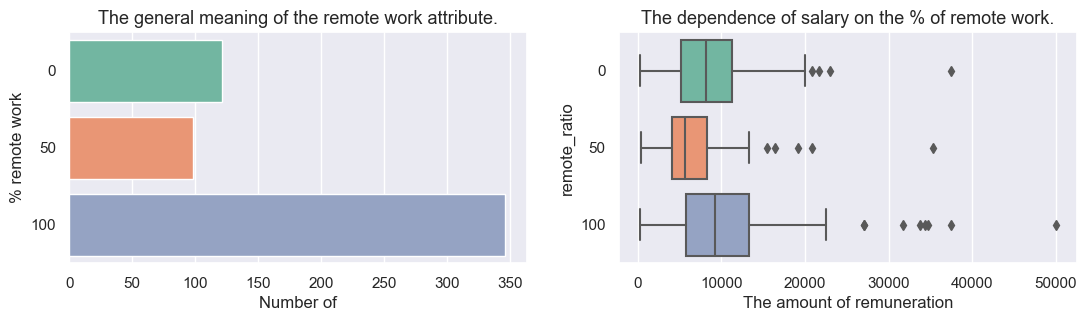

In [278]:
fig, axes = plt.subplots(1, 2, figsize=(13, 3))

sns.barplot(x=data['frequency'], y=data.index, orient='h', ax=axes[0])
axes[0].set_title('The general meaning of the remote work attribute.', size=13)
axes[0].set(xlabel='Number of', ylabel='% remote work')

sns.boxplot(df_salaries,  x='monthly_salary',
            y='remote_ratio', orient='h', ax=axes[1])
axes[1].set(xlabel='The amount of remuneration')
axes[1].set_title('The dependence of salary on the % of remote work.', size=13)

plt.show()

In [279]:
# Table of wages depending on the distance of work.
table = df_salaries.groupby('remote_ratio')[
    'monthly_salary'].describe().round()
print('The amount of salary depends on the distance of work.')
table

The amount of salary depends on the distance of work.


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,121.0,8815.0,5699.0,238.0,5166.0,8179.0,11333.0,37500.0
50,98.0,6726.0,4803.0,450.0,4166.0,5667.0,8327.0,35250.0
100,346.0,10063.0,6244.0,333.0,5833.0,9226.0,13312.0,50000.0


**Conclusion:**
- work with a distance level of 100% takes 1st place and a share of 61% of the total number of Data Scientist professions;
- PO (salary) with the level of remote work of 100%, higher than others; 
- how does the *remote_ratio* attribute affect the salary level of a Data Scientist specialist.

In order to check whether these differences are statistically significant, we will conduct statistical testing in an additional study.

3. The general feature **experience_level** (level of experience) does it affect the salary level.

In [280]:
data = df_salaries['experience_level'].value_counts().to_frame()
data

,experience_level
SE,243
MI,208
EN,88
EX,26


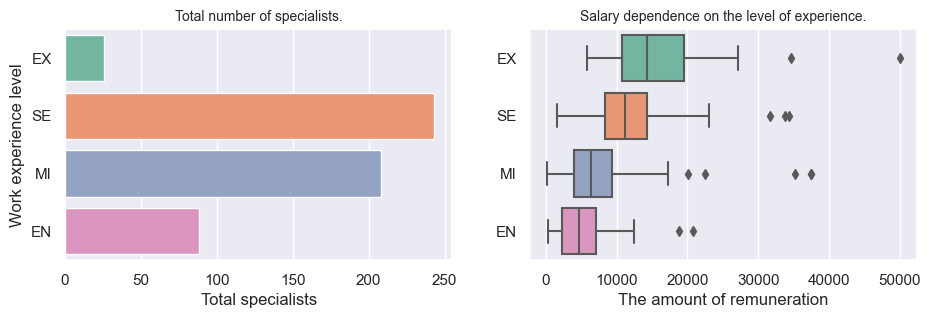

In [281]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

sns.barplot(x=data['experience_level'], y=data.index, ax=axes[0],
            order=['EX', 'SE', 'MI', 'EN'])
axes[0].set_title('Total number of specialists.', size=10)
axes[0].set(xlabel='Total specialists', ylabel='Work experience level')

sns.boxplot(df_salaries,  x='monthly_salary', y='experience_level',
            orient='h', ax=axes[1], order=['EX', 'SE', 'MI', 'EN'])
axes[1].set(xlabel='The amount of remuneration', ylabel=None)
axes[1].set_title('Salary dependence on the level of experience.', size=10)

plt.show()

In [282]:
# Salary table depending on work experience.
table = df_salaries.groupby('experience_level')[
    'monthly_salary'].describe().round()
print('The amount of salary depending on work experience.')
table

The amount of salary depending on work experience.


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,5137.0,3700.0,333.0,2292.0,4708.0,7118.0,20833.0
EX,26.0,16616.0,9756.0,5811.0,10834.0,14286.0,19479.0,50000.0
MI,208.0,7316.0,5343.0,238.0,3930.0,6411.0,9339.0,37500.0
SE,243.0,11531.0,4996.0,1575.0,8294.0,11250.0,14323.0,34333.0


Values on the work experience chart: 
1. EN — Entry-level/Junior;
2. MI — Mid-level/Intermediate;
3. SE — Senior-level/Expert;
4. EX — Executive-level/Director.

**Output:**

* The largest market share is made up of *Senior-level/Expert* and *Mid-level/Intermediate* specialists, respectively.

* The graph shows the level of experience has a significant impact on the level of wages. For example, the work experience of SE(Expert) and EX(Director) is estimated 1.5-3 times higher than the level of EN(Junior) and MI(Intermediate).

* as a sign of *experience_level* affects the salary level of a Data Scientist specialist. 

In order to check whether these differences are statistically significant, we will conduct statistical testing as an additional study.

4. The general feature **job_title** whether it affects the salary level or not.

In [283]:
df_salaries.describe(include='object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,565,565,565,565,565,565
unique,4,4,16,10,10,3
top,SE,FT,Data Scientist,US,US,M
freq,243,546,130,295,318,290


Let's transform our data for clarity on graphs.

In [284]:
df_1 = df_salaries['job_title'].value_counts()
df_1.rename('count', inplace=True)
df_1.index.name = 'job_title'

# The order of professions
prof = list(df_1.index)

df_2 = df_salaries.groupby('job_title')['monthly_salary'].quantile(0.5).round()
df_2 = df_2.rename('mean_salary')

data = pd.concat([df_1, df_2], axis=1)
data

,count,mean_salary
job_title,,
Data Scientist,130,8333.0
Data Engineer,121,8400.0
other,97,8166.0
Data Analyst,82,7500.0
Machine Learning Engineer,39,7285.0
Research Scientist,16,6355.0
Data Science Manager,12,12979.0
Data Architect,11,15000.0
Machine Learning Scientist,8,13042.0


The table above shows the number of specialties on the market and the average salary. 

Let's depict this on graphs.

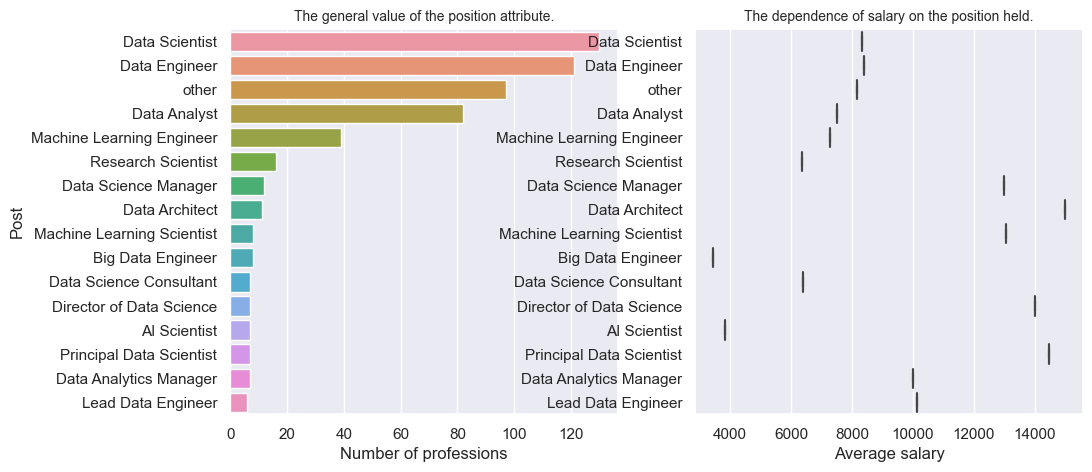

In [285]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

sns.barplot(data, x=data['count'], y=data.index, ax=axes[0])
axes[0].set_title('The general value of the position attribute.', size=10)
axes[0].set(xlabel='Number of professions', ylabel='Post')

sns.boxplot(data,  x=data['mean_salary'],
            y=data.index, ax=axes[1])

axes[1].set_title('The dependence of salary on the position held.', size=10)
axes[1].set(xlabel='Average salary', ylabel=None)

plt.show()

In [286]:
# Salary table depending on the position held.
table = df_salaries.groupby('job_title')[
    'monthly_salary'].describe().round()
print('The amount of salary depending on the position held.')
table

The amount of salary depending on the position held.


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
AI Scientist,7.0,5511.0,5846.0,1000.0,1252.0,3824.0,7292.0,16666.0
Big Data Engineer,8.0,4331.0,3579.0,490.0,1463.0,3442.0,6646.0,9503.0
Data Analyst,82.0,7507.0,3391.0,506.0,5027.0,7500.0,9676.0,16666.0
Data Analytics Manager,7.0,10594.0,1488.0,8783.0,9553.0,10000.0,11874.0,12521.0
Data Architect,11.0,14823.0,3810.0,7558.0,12408.0,15000.0,16722.0,22200.0
Data Engineer,121.0,9145.0,4850.0,333.0,5501.0,8400.0,12500.0,27000.0
Data Science Consultant,7.0,5785.0,2580.0,475.0,5565.0,6402.0,6951.0,8583.0
Data Science Manager,12.0,13194.0,4383.0,4507.0,11857.0,12979.0,14838.0,20083.0
Data Scientist,130.0,8611.0,5331.0,238.0,4194.0,8333.0,11700.0,34333.0


**Output:**

* the most common professions *Data Science*, *Data Engineer*, *Data Analyst* receive salaries in the region of 8000 dollars;
* highest average salary of 13,000 y *DataArchitect*,
* smallest 3800 y *Big Data Engineer*;
* *job_title* affects the salary level.

In order to check whether these differences are statistically significant, we will conduct statistical testing in the next section.


5. The general feature **company_size** (the size of the company) whether it affects the salary level or not.

* *S* - less than 50 employees (small company);
* *M* - from 50 to 250 employees (medium company);
* *L* - more than 250 employees (large company)

Let's look at the data of the *company_size* attribute.

In [287]:
df_salaries['company_size'].describe(include='object').to_frame()

,company_size
count,565
unique,3
top,M
freq,290


The total number of companies is 565, the most common M - medium companies with the number of employees from 50 to 250 people.

In [288]:
data = df_salaries['company_size'].value_counts().to_frame()
data

,company_size
M,290
L,193
S,82


Let's show the data on the graph.

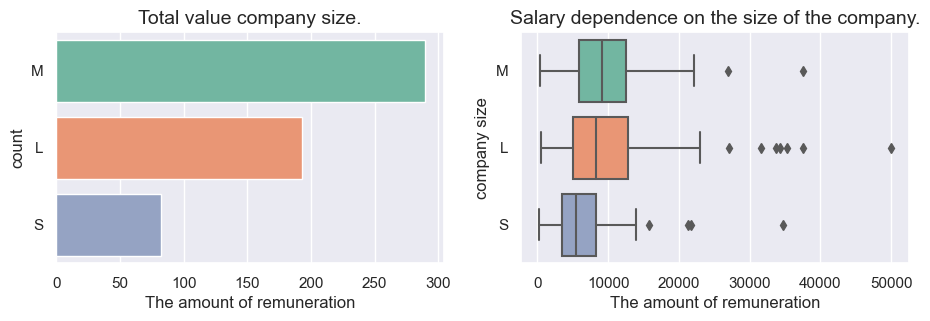

In [289]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

sns.barplot(y=data.index, x=data['company_size'],
            orient='h', ax=axes[0])
axes[0].set_title('Total value company size.', size=14)
axes[0].set(xlabel='The amount of remuneration', ylabel='count')

sns.boxplot(df_salaries.sort_values('company_size', ascending=True),  x='monthly_salary',
            y='company_size', orient='h', ax=axes[1],
            order=['M', 'L', 'S'])
axes[1].set(xlabel='The amount of remuneration', ylabel='company size')
axes[1].set_title('Salary dependence on the size of the company.', size=14)

plt.show()

In [290]:
# Salary table depending on the size of the company.
table = df_salaries.groupby('company_size')[
    'monthly_salary'].describe().round()
print('The amount of salary depends on the size of the company.')
table

The amount of salary depends on the size of the company.


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,193.0,9851.0,7230.0,490.0,5000.0,8333.0,12805.0,50000.0
M,290.0,9567.0,5065.0,333.0,5902.0,9136.0,12517.0,37500.0
S,82.0,6489.0,5318.0,238.0,3484.0,5458.0,8333.0,34666.0


**Output:**

* The graphs show that small companies have a lower salary range than medium and large ones. Perhaps because they cannot afford to have a large staff of specialists due to the volume of work, as well as the ability to bear costs.

* The size of the company is weak, but it affects the salary of employees, especially the differences in small companies are clearly visible. 

In order to check whether these differences are statistically significant, we will conduct statistical testing in the next section.

6. The general feature **company_location** (the location of the main office of the company) whether it affects the salary level or not.

Let's look at the data of the *company_location* attribute.

In [291]:
df_salaries['company_location'].describe(include='object').to_frame()

,company_location
count,565
unique,10
top,US
freq,318


Most of the companies are located in the US. There are 10 unique values in total.

In [292]:
data = df_salaries['company_location'].value_counts().to_frame()
# List of countries of companies
locations = list(data.index)
data

,company_location
US,318
other,77
GB,46
CA,28
DE,27
IN,24
FR,15
ES,14
GR,10
JP,6


Companies with the name *other* have 1-2 companies, we have combined for ease of visualization.

Let's build graphs.

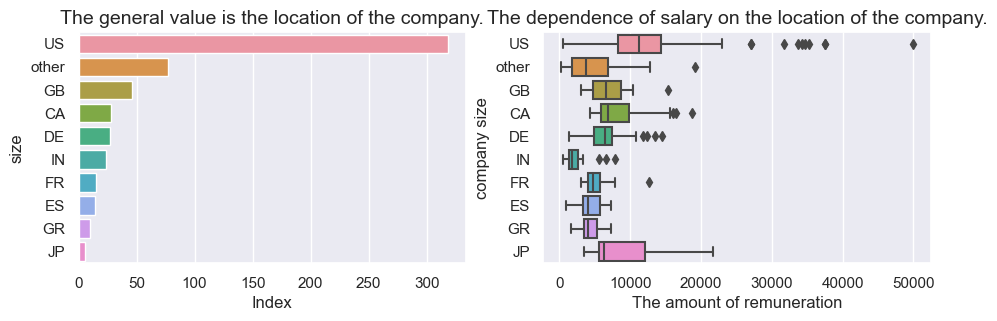

In [293]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

sns.barplot(y=data.index, x=data['company_location'],
            orient='h', ax=axes[0])
axes[0].set_title('The general value is the location of the company.', size=14)
axes[0].set(xlabel='Index', ylabel='size')

sns.boxplot(df_salaries.sort_values('company_location', ascending=True),
            x='monthly_salary', y='company_location', orient='h', ax=axes[1],
            order=locations)
axes[1].set(xlabel='The amount of remuneration', ylabel='company size')
axes[1].set_title('The dependence of salary on the location of the company.', size=14)

plt.show()

In [294]:
# Salary table by location of the company.
table = df_salaries.groupby('company_location')[
    'monthly_salary'].describe().round()
print('The amount of salary depends on the size of the company.')
table

The amount of salary depends on the size of the company.


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
CA,28.0,8343.0,3923.0,4333.0,5876.0,6824.0,9780.0,18750.0
DE,27.0,6796.0,3325.0,1330.0,4888.0,6402.0,7474.0,14480.0
ES,14.0,4421.0,1758.0,862.0,3339.0,4030.0,5732.0,7327.0
FR,15.0,5330.0,2390.0,3053.0,4016.0,4728.0,5761.0,12666.0
GB,46.0,6804.0,2487.0,3108.0,4743.0,6543.0,8693.0,15269.0
GR,10.0,4335.0,1696.0,1666.0,3428.0,4056.0,5266.0,7327.0
IN,24.0,2381.0,1891.0,450.0,1394.0,1844.0,2680.0,7888.0
JP,6.0,9510.0,6965.0,3474.0,5523.0,6306.0,12112.0,21666.0
US,318.0,12024.0,6044.0,473.0,8333.0,11250.0,14416.0,50000.0


**Output:**

* The location of the company affects the salary level of employees. 

In order to check whether these differences are statistically significant, we will conduct statistical testing in the next section.

### We will give graphic answers to the questions posed.

1. Is there an increase in salaries of *Data Scientist* specialists for each year?
2. How do the salaries of *Data Scientist* and *Data Engineer* compare in 2022?
3. How do the salaries of *Data Scientist* and *Data Engineer* specialists in companies of various sizes compare?
4. Is there a connection between the presence of positions *Data Scientist* and *Data Engineer* and the size of the company?

### Question 1. Is there an increase in salaries of *Data Scientist* specialists for each year?

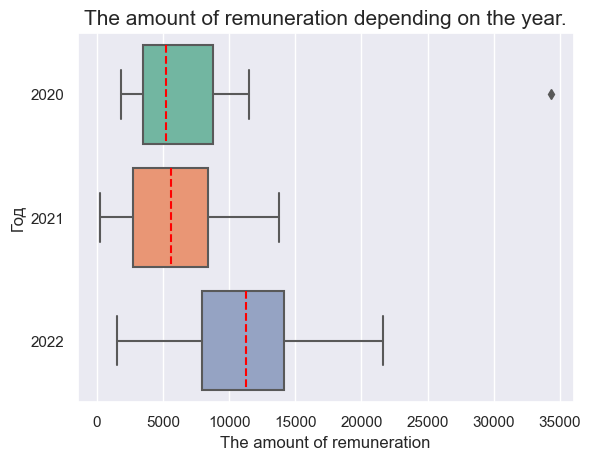

In [295]:
# Filter out only the values for Data Scientist.
ds = df_salaries[df_salaries['job_title'] == 'Data Scientist']

# Let's build box diagrams by year.
ax = sns.boxplot(ds,  x='monthly_salary', y='work_year', orient='h',
                 medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='The amount of remuneration', ylabel='Год')
plt.title('The amount of remuneration depending on the year.', size=15)
plt.show()

In [296]:
ds.groupby('work_year')['monthly_salary'].describe().round()

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,7164.0,6786.0,1805.0,3516.0,5227.0,8750.0,34333.0
2021,44.0,5851.0,3820.0,238.0,2732.0,5602.0,8410.0,13750.0
2022,65.0,10947.0,4649.0,1536.0,7962.0,11250.0,14166.0,21666.0


**Output:** the salary growth of a Data Scientist specialist is observed only from 2021 to 2022. In order to check whether these differences are statistically significant, we will conduct statistical testing in the next section.

### Question 2. How do the salaries of *Data Scientist* and *Data Engineer* compare in 2022?

In [297]:
# Filter out the necessary data
de_ds_22 = df_salaries.loc[(df_salaries['work_year'] == 2022), [
    'monthly_salary', 'work_year', 'job_title']]

de_ds_22 = de_ds_22.loc[(de_ds_22['job_title'] == 'Data Engineer') |
                        (de_ds_22['job_title'] == 'Data Scientist')]

de_ds_22

,monthly_salary,work_year,job_title
289,11250,2022,Data Engineer
292,10833,2022,Data Scientist
293,7500,2022,Data Scientist
294,14166,2022,Data Engineer
295,12500,2022,Data Engineer
...,...,...,...
593,12500,2022,Data Scientist
598,13333,2022,Data Scientist
599,10833,2022,Data Scientist
602,12833,2022,Data Engineer


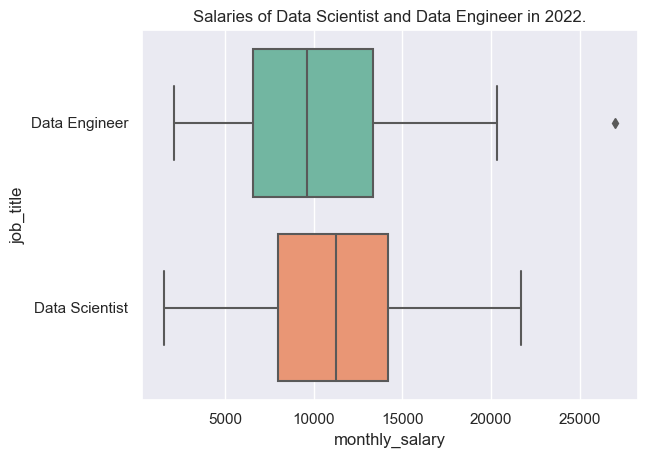

In [298]:
#  Let's build a graph
boxplot = sns.boxplot(
    de_ds_22, x=de_ds_22['monthly_salary'], y=de_ds_22['job_title'])
plt.title('Salaries of Data Scientist and Data Engineer in 2022.')
plt.show()

In [299]:
print('Зарплаты Data Scientist и Data Engineer в 2022 году.')
de_ds_22.groupby('job_title')['monthly_salary'].describe().round()

Зарплаты Data Scientist и Data Engineer в 2022 году.


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,10387.0,4821.0,2083.0,6543.0,9583.0,13336.0,27000.0
Data Scientist,65.0,10947.0,4649.0,1536.0,7962.0,11250.0,14166.0,21666.0


**Output:** salaries of *Data Scientist* in 2022, more than that of *Data Engineer*.  In order to check whether these differences are statistically significant, we will conduct statistical testing in the next section.

### Question 3. How do the salaries of *Data Scientist* and *Data Engineer* specialists in companies of various sizes compare?

In [300]:
# Filter out the necessary data
de_ds_comp_size = df_salaries.loc[(df_salaries['job_title'] == 'Data Engineer') | (
    df_salaries['job_title'] == 'Data Scientist'), ['monthly_salary', 'company_size', 'job_title', 'work_year']]

de_ds_comp_size

,monthly_salary,company_size,job_title,work_year
0,6652,L,Data Scientist,2020
7,2977,L,Data Scientist,2020
10,4276,S,Data Scientist,2020
11,3373,L,Data Scientist,2020
12,3326,M,Data Scientist,2020
...,...,...,...,...
593,12500,M,Data Scientist,2022
598,13333,M,Data Scientist,2022
599,10833,M,Data Scientist,2022
602,12833,M,Data Engineer,2022


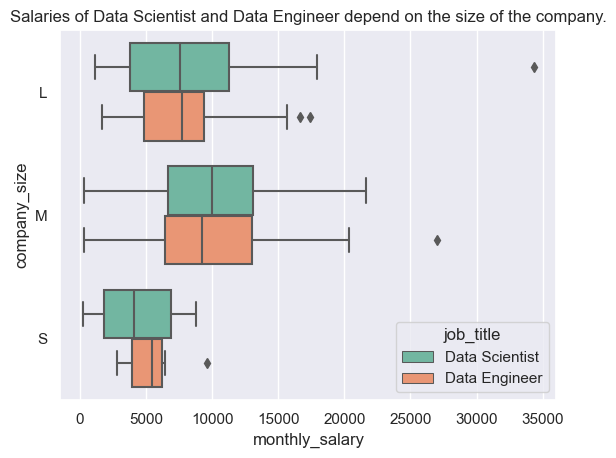

In [301]:
#  Let's build a graph
boxtplot = sns.boxplot(de_ds_comp_size, x=de_ds_comp_size['monthly_salary'],
                       y=de_ds_comp_size['company_size'], hue='job_title',
                       order=['L', 'M', 'S'])
plt.title('Salaries of Data Scientist and Data Engineer depend on the size of the company.')
plt.show()

In [302]:
print('Salaries of Data Scientist and Data Engineer depend on the size of the company.')
de_ds_comp_size.groupby(['company_size', 'job_title'])[
    'monthly_salary'].describe().round()

Salaries of Data Scientist and Data Engineer depend on the size of the company.


count     mean     std     min     25%     50%  \
company_size job_title                                                        
L            Data Engineer    34.0   8073.0  4334.0  1666.0  4887.0  7762.0   
             Data Scientist   43.0   8562.0  6105.0  1116.0  3770.0  7561.0   
M            Data Engineer    81.0   9864.0  5019.0   333.0  6411.0  9208.0   
             Data Scientist   66.0  10006.0  4696.0   333.0  6666.0  9960.0   
S            Data Engineer     6.0   5528.0  2405.0  2792.0  3960.0  5458.0   
             Data Scientist   21.0   4327.0  2768.0   238.0  1805.0  4105.0   

                                 75%      max  
company_size job_title                         
L            Data Engineer    9414.0  17425.0  
             Data Scientist  11250.0  34333.0  
M            Data Engineer   13050.0  27000.0  
             Data Scientist  13125.0  21666.0  
S            Data Engineer    6177.0   9583.0  
             Data Scientist   6875.0   8750.0

**Output:**
- salaries of *Data Scientist* and *Data Engineer* vary depending on the size of the company. The average salary in companies of the size of *M* is higher than in others, and the salary of specialists in companies of different sizes is approximately the same.  In order to check whether these differences are statistically significant, we will conduct statistical testing in the next section.

### 4. Is there a connection between the presence of positions *Data Scientist* and *Data Engineer* and the size of the company?

Let's find the correlation coefficient and plot the graphs.

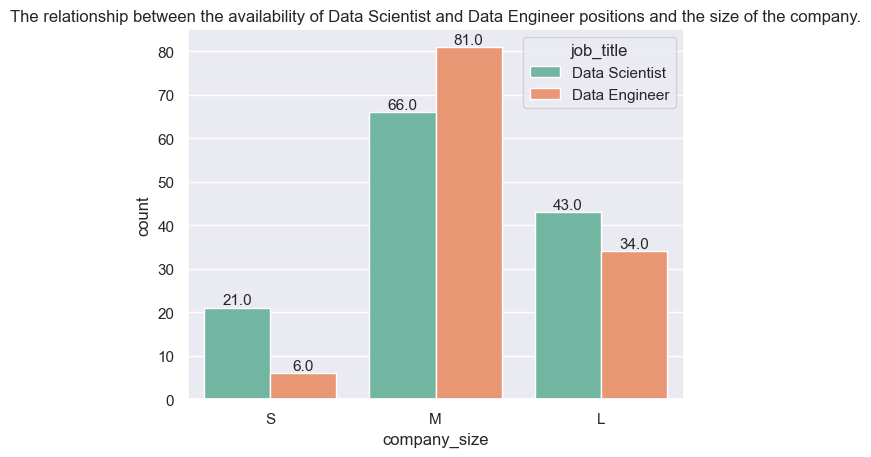

In [303]:
ax = sns.countplot(de_ds_comp_size, x=de_ds_comp_size['company_size'],
                   hue='job_title', order=['S', 'M', 'L'])
plt.title('The relationship between the availability of Data Scientist and Data Engineer positions and the size of the company.')
# To display values on a graph.
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,
            rect.get_height(), horizontalalignment='center', fontsize=11)

plt.show()

In [304]:
crosstab = pd.crosstab(
    de_ds_comp_size['company_size'], de_ds_comp_size['job_title'])
crosstab['DE/DS соотношение'] = round(
    crosstab['Data Engineer']/crosstab['Data Scientist'], 2)
crosstab

job_title,Data Engineer,Data Scientist,DE/DS соотношение
company_size,,,
L,34,43,0.79
M,81,66,1.23
S,6,21,0.29


**Output:** 
- for large companies DE(Data Engineer) < DS(Data Scientist);
- for medium-sized companies DE > DS;
- for small companies DE < DS.

In order to check whether these differences are statistically significant, we will conduct statistical testing in the next section.

### II.2. Statistical data analysis.

For statistical analysis , we will write three functions:

1. Function <font color='green'><i>decision_normality()</i></font> - checks the data for normality and makes a conclusion whether the data is distributed normally or not.

2. The function <font color='green'><i>decision_variance()</i></font> checks the data for equality of variances and concludes whether the variances are equal or not.

3. Function <font color='green'><i>decision_hypothesis()</i></font> - checks the data on the hypothesis and concludes whether there is a relationship between the signs or not, i.e. we accept the alternative or reject it.

In [305]:
# function for deciding on normality
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('''p-value is less than the specified significance level {:.2f}.
The distribution is different from normal.'''.format(alpha))
    else:
        print('''The p-value is greater than the specified significance level {:.2f}
The distribution is normal.'''.format(alpha))


# a function for making decisions about the equality of variances
def decision_variance(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('''The variances are not the same.''')
    else:
        print('''The variances are the same.''')


# function for deciding whether to reject the null hypothesis
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('''p-value is less than the specified significance level {:.2f}.
We reject the null hypothesis in favor of an alternative one.'''
              .format(alpha))
    else:
        print('''The p-value is greater than the specified significance level {:.2f}.
We have no reason to reject the null hypothesis.'''.format(alpha))

We will formulate hypotheses for the questions and conduct statistical testing:

#### **Question 1**. Is there an annual increase in salaries for *Data Scientist* specialists?

In [306]:
# Filter out only the values for Data Scientist.
ds = df_salaries[df_salaries['job_title'] == 'Data Scientist']

ds_agg = ds.groupby('work_year')['monthly_salary'].describe().round()
print('Descriptive Data Scientist Salary Table by year.')
ds_agg

Descriptive Data Scientist Salary Table by year.


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,7164.0,6786.0,1805.0,3516.0,5227.0,8750.0,34333.0
2021,44.0,5851.0,3820.0,238.0,2732.0,5602.0,8410.0,13750.0
2022,65.0,10947.0,4649.0,1536.0,7962.0,11250.0,14166.0,21666.0


From the available data, we see that there are only 21 values in the **count** column for 2020, whereas there are 65 values for 2022. If we align the number of values by years, and fill in the missing ones with the average, then when using tests for 2 or 3 groups, we will get a non-correct conclusion on hypothysis. Therefore, we use tests for one group and compare it with the average salary value for the previous year.

**Formulate null and alternative hypotheses**

*Null hypothesis* ($H_0$): the salary in 2021 ($µ_1$) is statistically less than or equal to the average salary in 2020 = 7164 dollars.

$ H_0 : μ_1 <= 7164 $

*Alternative hypothesis* ($H_1$): the salary in 2021 ($µ_1$) is statistically larger than the average salary in 2021 = 7164 dollars.

$ H_1 : μ_1 > 7164 $

This hypothesis will be tested between the average wage in 2021 and the sample for 2022. 

**Checking for normality**

Using the Shapiro-Wilk test, we will check whether the attribute is distributed normally. Recall the hypotheses of the Shapiro-Wilk test:

*Null hypothesis* ($H_0$): The data distribution is normal.

*Alternative hypothesis* ($H_1$): The data distribution is different from normal.

In [307]:
# Let's set the level with which we will compare.
salary_20_m = ds_agg['mean'].iloc[0]
salary_21_m = ds_agg['mean'].iloc[1]

# Let's create a sample of salaries by year for Data Scientist.
salary_21 = ds[ds['work_year'] == 2021]['monthly_salary']
salary_22 = ds[ds['work_year'] == 2022]['monthly_salary']

# We conduct the Shapiro-Wilk test for the normality of the distribution by year.
print('For 2021:')
result = stats.shapiro(salary_21)
decision_normality(result[1])

print('For 2022:')
result = stats.shapiro(salary_22)
decision_normality(result[1])

For 2021:
p-value = 0.107
The p-value is greater than the specified significance level 0.05
The distribution is normal.
For 2022:
p-value = 0.676
The p-value is greater than the specified significance level 0.05
The distribution is normal.


**Choose a suitable statistical test**

To select the desired test, use the test selection algorithm. To do this, we will answer the following questions:
* What is the type of the "monthly_salary" attribute? — Quantitative.
* How many groups are being compared? — Alone.
* Are groups dependent? - no.
* Is the attribute distributed according to the normal law? - yes.

To test our hypothesis, we can use a *single-sample t-test* to compare distributions with a given level.

**We will conduct a test**

In [308]:
# we are conducting a test
_, p = stats.ttest_1samp(salary_21, popmean=salary_20_m, alternative='greater')
print('2021:')
decision_hypothesis(p)

_, p = stats.ttest_1samp(salary_22, popmean=salary_21_m, alternative='greater')
print('2022:')
decision_hypothesis(p)

2021:
p-value = 0.986
The p-value is greater than the specified significance level 0.05.
We have no reason to reject the null hypothesis.
2022:
p-value = 0.000
p-value is less than the specified significance level 0.05.
We reject the null hypothesis in favor of an alternative one.


**Conclusion on the 1st question:** 
* the salary of a Data Scientist in 2021 compared to the average in 2020 has not changed;
* the salary of a Data Scientist in 2022 is more than the average PO in 2021;
* there is no annual salary growth for *Data Scientist* specialists.

#### **Question 2**. How do the salaries of *Data Scientist* and *Data Engineer* compare in 2022?

In [309]:
# Let's create a table for the Data Scientist and Data Engineer PO for 2022.
de_ds_22 = df_salaries[((df_salaries['job_title'] == 'Data Scientist')
                       |(df_salaries['job_title'] == 'Data Engineer'))
                       &(df_salaries['work_year'] == 2022)]

de_ds_22_agg =  de_ds_22.groupby('job_title')['monthly_salary'].describe().round()
print('Wages values for 2022:')
de_ds_22_agg

Wages values for 2022:


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,10387.0,4821.0,2083.0,6543.0,9583.0,13336.0,27000.0
Data Scientist,65.0,10947.0,4649.0,1536.0,7962.0,11250.0,14166.0,21666.0


Data sampling by wages *Data Scientist* and *Data Engineer* are different. Align the data by adding an average value to them.

In [310]:
a = de_ds_22[de_ds_22['job_title']=='Data Engineer']['monthly_salary']
b = de_ds_22[de_ds_22['job_title']=='Data Scientist']['monthly_salary']

a.name='DE_salary'
b.name='DS_salary'

a.reset_index(drop=True,inplace=True)
b.reset_index(drop=True,inplace=True)

concat_table = pd.concat([a,b],axis=1)
values = {'DS_salary':concat_table['DS_salary'].mean().round()}
concat_table=concat_table.fillna(values)
concat_table

,DE_salary,DS_salary
0,11250,10833.0
1,14166,7500.0
2,12500,11385.0
3,4362,8280.0
4,20166,9815.0
...,...,...
74,2083,10947.0
75,18342,10947.0
76,13340,10947.0
77,12833,10947.0


Now we have the same sample of salary data for *Data Scientist* and *Data Engineer* in 2022. 

**Formulate null and alternative hypotheses**

*Null hypothesis* ($H_0$): The wages *Data Scientist*($μ_1$) and *Data Engineer*($μ_2$) are statistically equal to each other in 2022.

$ H_0 : μ_1 = μ_2 $

*Alternative hypothesis* ($H_1$): The wages *Data Scientist*($µ_1$) and *Data Engineer*($µ_2$) are statistically not equal to each other in 2022.

$ H_1 : μ_1 \neq  μ_2 $

**Checking for normality**

Using the Shapiro-Wilk test, we will check whether the attribute is distributed normally.

In [311]:
# We are conducting the Shapiro-Wilk test for the normality of the distribution by year.
print('ЗП Data Engineer в 22:')
result = stats.shapiro(concat_table['DE_salary'])
decision_normality(result[1])

print('ЗП Data Scientist в 22:')
result = stats.shapiro(concat_table['DS_salary'])
decision_normality(result[1])

ЗП Data Engineer в 22:
p-value = 0.007
p-value is less than the specified significance level 0.05.
The distribution is different from normal.
ЗП Data Scientist в 22:
p-value = 0.205
The p-value is greater than the specified significance level 0.05
The distribution is normal.


**Choose a suitable statistical test**

To select the desired test, use the test selection algorithm. To do this, we will answer the following questions:
* What is the type of the "Salary amount" attribute? — Quantitative.
* How many groups are being compared? — Two.
* Are groups dependent? - no.
* Is the attribute distributed according to the normal law? - no.
* Are the variances equal or not? because the feature is not distributed according to the normal law, it makes no sense to compare the variances.

To test our hypothesis, we can use the nonparametric Mann-Whitney U-test of the *scipy.stats.mannwhitneyu* library.

**Let's conduct a test**

In [312]:
# we are conducting a test
_, p = stats.mannwhitneyu(
    concat_table['DE_salary'], concat_table['DS_salary'], alternative='two-sided')
print('ЗП Data Scientist и Data Engineer в 2022 году:')
decision_hypothesis(p)

ЗП Data Scientist и Data Engineer в 2022 году:
p-value = 0.258
The p-value is greater than the specified significance level 0.05.
We have no reason to reject the null hypothesis.


**Conclusion on the 2nd question:** 
* salaries of Data Scientist and *Data Engineer* in 2022 are statistically equal.

#### **Question 3**. How do the salaries of *Data Scientist* and *Data Engineer* specialists in companies of various sizes compare?

Types of companies by size:
* S — less than 50 employees (small company);
* M — from 50 to 250 employees (medium company);
* L — more than 250 employees (large company)

We have previously graphically found out that the wages *Data Scientist* and *Data Engineer* differ in companies of different sizes, we will conduct a test for the statistical significance of our hypothysis.

**Formulate null and alternative hypotheses**

*Null hypothesis* ($H_0$): The wages *Data Scientist* and *Data Engineer* in companies of different sizes are statistically equal to each other, where $μ_1$ is S (small company), $μ_2$ is M (medium company) and $μ_3$ is L (large company)

$ H_0 : μ_1 = μ_2 = μ_3 $

*Alternative hypothesis* ($H_1$): JV *Data Scientist* and *Data Engineer* in companies of different sizes are statistically not equal to each other.

$ H_1 : μ_1 \neq  μ_2 \neq  μ_3 $

In [313]:
print('Total values of the wages Data Scientist and Data Engineer:')
de_ds_comp_size['company_size'].value_counts()

Total values of the wages Data Scientist and Data Engineer:


M    147
L     77
S     27
Name: company_size, dtype: int64

In [314]:
ds = de_ds_comp_size[de_ds_comp_size['job_title'] == 'Data Scientist']

print(f'''The number of Data Scientist wages values depending on the size of the company:
{ds['company_size'].value_counts()}\n''')

de = de_ds_comp_size[de_ds_comp_size['job_title'] == 'Data Engineer']

print(f'''The number of Data Engineer wages values depends on the size of the company:
{de['company_size'].value_counts()}''')

The number of Data Scientist wages values depending on the size of the company:
M    66
L    43
S    21
Name: company_size, dtype: int64

The number of Data Engineer wages values depends on the size of the company:
M    81
L    34
S     6
Name: company_size, dtype: int64


Since the variations of the PO in *Data Engineer* in small companies *S* are numerically small, we will ignore it by conducting statistical analysis and will consider the ratio only for companies with the size *M* and *L*.

Fill in the missing data and bring it to the total maximum value for the sample. For Data Scientist max_ds = 66, for Data Engineer max_de = 81.  Let's write the function **increase_sample** *sample increment via interpolation* and apply it.

In [315]:
def increase_sample(data, n, vis=False):
    """Increasing the sample through interpolation.

    Args:
        data (_list_): initial list of values
        n (_int_): the number of values to come to
        vis (_bool_): visualizations, no default
    Returns:
        _array_: _enlarged list of valuesй_
    """
    # scale by the size of the desired number of observations
    x = list(range(n))

    # scale by the size of the available number of observations
    xp = np.linspace(0, n-1, num=len(data))

    # data and method
    fp = data
    data_interp = np.interp(x, xp, fp)

    # visualization
    if vis:
        plt.scatter(x, data_interp)  # new points on the chart
        plt.scatter(xp, data)        # old points on the graph
        
    return data_interp

For clarity, how to change the sample for the Data Scientist wages
with the size of the company L. The orange dots of the value are "up to", the green "ones are incremental".


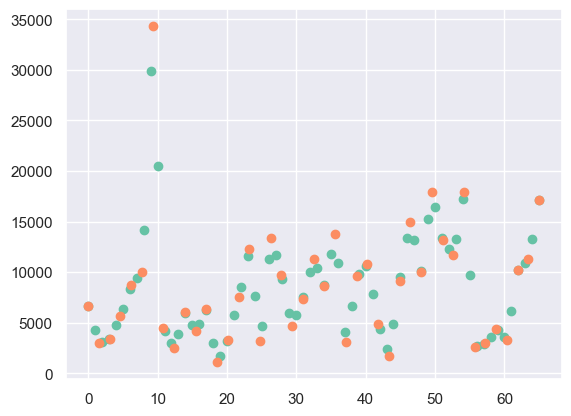

In [316]:
# For Data Scientist

# Variation of PO values depending on the size of companies.
ds_M = list(ds['monthly_salary'][ds['company_size'] == 'M'])
ds_L = list(ds['monthly_salary'][ds['company_size'] == 'L'])
ds_S = list(ds['monthly_salary'][ds['company_size'] == 'S'])

de_M = list(de['monthly_salary'][de['company_size'] == 'M'])
de_L = list(de['monthly_salary'][de['company_size'] == 'L'])

# desired number of observations
max_ds = 66
max_de = 81

print(f'''For clarity, how to change the sample for the Data Scientist wages
with the size of the company L. The orange dots of the value are "up to", the green "ones are incremental".''')
inc_ds_L = increase_sample(ds_L, max_ds, vis=True).astype(int)
inc_ds_S = increase_sample(ds_S, max_ds).astype(int)
inc_de_L = increase_sample(de_L, max_de).astype(int)

**Checking for normality**

Using the Shapiro-Wilk test, we will check whether the attribute is distributed normally.

In [317]:
# We perform the Shapiro-Wilk test for the normality of the distribution.
print('For the Data Scientist wages:')
print('M:')
result = stats.shapiro(ds_M)
decision_normality(result[1])
print('L:')
result = stats.shapiro(inc_ds_L)
decision_normality(result[1])
print('S:')
result = stats.shapiro(inc_ds_S)
decision_normality(result[1])


print('\nFor the Data Engineer wages:')
print('M:')
result = stats.shapiro(de_M)
decision_normality(result[1])
print('L:')
result = stats.shapiro(inc_de_L)
decision_normality(result[1])

For the Data Scientist wages:
M:
p-value = 0.896
The p-value is greater than the specified significance level 0.05
The distribution is normal.
L:
p-value = 0.000
p-value is less than the specified significance level 0.05.
The distribution is different from normal.
S:
p-value = 0.047
p-value is less than the specified significance level 0.05.
The distribution is different from normal.

For the Data Engineer wages:
M:
p-value = 0.085
The p-value is greater than the specified significance level 0.05
The distribution is normal.
L:
p-value = 0.016
p-value is less than the specified significance level 0.05.
The distribution is different from normal.


**Choose a suitable statistical test**

To select the desired test, use the test selection algorithm. To do this, we will answer the following questions.

*Data Scientist*:
* What is the type of the "monthly_salary" attribute? — Quantitative.
* How many groups are being compared? — Three.
* Are groups dependent? - no.
* Is the attribute distributed according to the normal law? - no. 

To test our hypothesis, we can use the Kruskal Wallis criterion.

*Data Engineer*:
* What is the type of the "monthly_salary" attribute? — Quantitative.
* How many groups are being compared? — Two.
* Are groups dependent? - no.
* Is the attribute distributed according to the normal law? - no. 

To test our hypothesis, we can use the Mann-Whitney U-test.

**We will conduct a test**

In [318]:
# we are conducting a test
_, p = stats.kruskal(inc_ds_L, ds_M, inc_ds_S)
print('Data Scientist in companies with size M and S:')
decision_hypothesis(p)

_, p = stats.mannwhitneyu(de_M, inc_de_L, alternative='two-sided')
print('\nData Engineer in companies with size M and L:')
decision_hypothesis(p)

Data Scientist in companies with size M and S:
p-value = 0.000
p-value is less than the specified significance level 0.05.
We reject the null hypothesis in favor of an alternative one.

Data Engineer in companies with size M and L:
p-value = 0.030
p-value is less than the specified significance level 0.05.
We reject the null hypothesis in favor of an alternative one.


**Conclusion on the 3rd question:**
* The size of the company affects the salary of *Data Scientist* and *Data Engineer*.

#### **Question 4**. Is there a connection between the presence of positions *Data Scientist* and *Data Engineer* and the size of the company?

In [319]:
de_ds_comp_size

,monthly_salary,company_size,job_title,work_year
0,6652,L,Data Scientist,2020
7,2977,L,Data Scientist,2020
10,4276,S,Data Scientist,2020
11,3373,L,Data Scientist,2020
12,3326,M,Data Scientist,2020
...,...,...,...,...
593,12500,M,Data Scientist,2022
598,13333,M,Data Scientist,2022
599,10833,M,Data Scientist,2022
602,12833,M,Data Engineer,2022


We deduce the presence of positions depending on the size of the company.

In [320]:
a = de_ds_comp_size.groupby(by='job_title')[
    'company_size'].value_counts().to_frame()
a

company_size
job_title      company_size              
Data Engineer  M                       81
               L                       34
               S                        6
Data Scientist M                       66
               L                       43
               S                       21

**Conclusion on the 4th question**:
* We cannot conduct a statistical analysis between the availability of positions *Data Scientist* and *Data Engineer* and the size of the company, there is not enough data for this. We have information for 3 years, we can break down and build a table of how the ratio of specialties has changed in companies of different sizes, but this will not be enough to make any statistically sound conclusion.

#### **Additional research:**
**Question 5.** Is there a dependence of the salary level of a specialist *Data Scientist* depending on work experience (position held)? 

Values *experience levels*: 
1. EN — Entry-level/Junior (начальный);
2. MI — Mid-level/Intermediate (средний);
3. SE — Senior-level/Expert (эксперт);
4. EX — Executive-level/Director (директор).

Previously, graphically, we found out that the wages *Data Scientist*, depending on the experience of working with each level above, we will conduct a test for the statistical significance of our hypothysis.

**Formulate null and alternative hypotheses**

*Null hypothesis* ($H_0$): wages *Data Scientist* does not differ depending on the level of work experience, where $μ_1$ is EN (Entry-level), $μ_2$ is MI (Mid-level) and $μ_3$ is SE (Senior-level), $μ_4$ - EX (Executive-level).

$ H_0 : μ_1 = μ_2 = μ_3 $

*Alternative hypothesis* ($H_1$): wages *Data Scientist*, depending on the level of work experience, are statistically not equal to each other, i.e. each next level is higher than the other.

$ H_1 : μ_1 <  μ_2 < μ_3 < μ_4 $

We will make the necessary selection, where:

- *en* - list of wages values, for entry level;
- *mi* - list of wages values, for the average level;
- *se* - a list of wages values, for the expert level.
- *ex* - list of wages values, for the director level.

In [321]:
# We will make the necessary selection.
en = list(df_salaries[df_salaries['experience_level']
          == 'EN'].loc[:, 'monthly_salary'])
mi = list(df_salaries[df_salaries['experience_level']
          == 'MI'].loc[:, 'monthly_salary'])
se = list(df_salaries[df_salaries['experience_level']
          == 'SE'].loc[:, 'monthly_salary'])
ex = list(df_salaries[df_salaries['experience_level']
          == 'EX'].loc[:, 'monthly_salary'])

Consider a grouped table by level of work experience.

In [322]:
table = df_salaries.groupby('experience_level')[
    'monthly_salary'].describe().astype('int')
table

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88,5136,3699,333,2291,4708,7118,20833
EX,26,16615,9756,5811,10833,14286,19478,50000
MI,208,7315,5343,238,3930,6411,9339,37500
SE,243,11530,4996,1575,8294,11250,14323,34333


In the table above, the **count** column shows the number of professions of all levels, they are different from each other. The *SE* group has the largest value in the *count* column. Let's use the **increase_sample**  *function to increase the sample through interpolation* and align the value to max = 243.

In [323]:
# n - required number of examples
n = 243
en_inc = increase_sample(en, n)
print(f'now EN = {len(en_inc)}')
mi_inc = increase_sample(mi, n)
print(f'now MI = {len(mi_inc)}')
ex_inc = increase_sample(ex, n)
print(f'now EX = {len(ex_inc)}')

now EN = 243
now MI = 243
now EX = 243


Now the sample size for each level of experience is the same as for the largest *SE* of them.

**Checking for normality**

Using the Shapiro-Wilk test, we will check whether the attribute is distributed normally.

In [324]:
# We perform the Shapiro-Wilk test for the normality of the distribution.
print('EN:')
result = stats.shapiro(en_inc)
decision_normality(result[1])

print('MI:')
result = stats.shapiro(mi_inc)
decision_normality(result[1])

print('SE:')
result = stats.shapiro(se)
decision_normality(result[1])

print('EX:')
result = stats.shapiro(ex_inc)
decision_normality(result[1])

EN:
p-value = 0.000
p-value is less than the specified significance level 0.05.
The distribution is different from normal.
MI:
p-value = 0.000
p-value is less than the specified significance level 0.05.
The distribution is different from normal.
SE:
p-value = 0.000
p-value is less than the specified significance level 0.05.
The distribution is different from normal.
EX:
p-value = 0.000
p-value is less than the specified significance level 0.05.
The distribution is different from normal.


**Choose a suitable statistical test**

For all levels of *experience_level* the values are the same:
* What is the type of the "monthly_salary" attribute? — Quantitative.
* How many groups are being compared? — Two.
* Are groups dependent? - no.
* Is the attribute distributed according to the normal law? - no. 

To test our hypothesis, we can use the Mann-Whitney U-test.

**We will conduct a test**

In [325]:
# Let's compare EN(initial) with MI (average) level.
_, p = stats.mannwhitneyu(en_inc, mi_inc, alternative='less')
print("\n Let's compare the level with the experience of EN and MI:")
decision_hypothesis(p)

# Сравним MI(средний) с SE('экспертным') уровнем.
_, p = stats.mannwhitneyu(mi_inc, se, alternative='less')
print("\n Let's compare the level with the experience of MI и EX:")
decision_hypothesis(p)

# Сравним SE('экспертный') с EX('директор') уровнем.
_, p = stats.mannwhitneyu(se, ex_inc, alternative='less')
print("\n Let's compare the level with the experience of SE and EX:")
decision_hypothesis(p)


 Let's compare the level with the experience of EN and MI:
p-value = 0.000
p-value is less than the specified significance level 0.05.
We reject the null hypothesis in favor of an alternative one.

 Let's compare the level with the experience of MI и EX:
p-value = 0.000
p-value is less than the specified significance level 0.05.
We reject the null hypothesis in favor of an alternative one.

 Let's compare the level with the experience of SE and EX:
p-value = 0.000
p-value is less than the specified significance level 0.05.
We reject the null hypothesis in favor of an alternative one.


**Conclusion on the 5th question**:
* The *experience_level* attribute affects the Data Scientist PO. Each and subsequent level of work experience is greater than the other, starting EN from the initial and ending with the director EX, this is confirmed both graphically and statistically.

**Question 6.** Is there a dependence of wages on the type of remoteness of work?

Values of remoteness types:

- 0 — no remote work (less than 20%);
- 50 — partially remote work;
- 100 — completely remote work (more than 80%).

Previously, graphically, we found out that the wages *Data Scientist*, depending on the experience of working with each level above, we will conduct a test for the statistical significance of our hypothysis.

**Formulate null and alternative hypotheses**

*Null hypothesis* ($H_0$): The wages *Data Scientist* does not differ depending on the type of remoteness, where $µ_1$ is $0$ (there is no remote work), $μ_2$ is $50$ (partially remote) and $μ_3$ is $100$ (completely remote).

$ H_0 : μ_1 = μ_2 = μ_3 $

*Alternative hypothesis* ($H_1$): The wages *Data Scientist*, depending on the type of work distance, are statistically not equal to each other.

$ H_1 : μ_1 \neq  μ_2 \neq μ_3 $

We will make the necessary selection, where:

- *rr_0* - list of wages values where there is no remote work;
- *rr_50* - list of wages values where the remote work is partially;
- *rr_100* - list of wages values where the work is completely remote.

In [326]:
# We will make the necessary selection.
rr_0 = list(df_salaries[df_salaries['remote_ratio']
            == 0].loc[:, 'monthly_salary'])
rr_50 = list(df_salaries[df_salaries['remote_ratio']
            == 50].loc[:, 'monthly_salary'])
rr_100 = list(df_salaries[df_salaries['remote_ratio']
            == 100].loc[:, 'monthly_salary'])

In [327]:
table = df_salaries.groupby('remote_ratio')[
    'monthly_salary'].describe().astype('int')
table

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,121,8815,5699,238,5166,8179,11333,37500
50,98,6726,4803,450,4166,5667,8326,35250
100,346,10063,6244,333,5833,9225,13312,50000


In the table above, the **count** column shows the number of professions of all levels by type of remoteness. They are different from each other. Let's use the **increase_sample** *function to increase the sample through interpolation* and align the value to the total value of the maximum value of 346.

In [328]:
# n - required number of examples
n = 346
rr_0_inc = increase_sample(rr_0, n)
print(f'now remote_ratio_0 = {len(rr_0_inc)}')
rr_50_inc = increase_sample(rr_50, n)
print(f'now remote_ratio_50 = {len(rr_50_inc)}')

now remote_ratio_0 = 346
now remote_ratio_50 = 346


Now the sample size for each level of experience is the same as for the largest SE of them.

**Checking for normality**

Using the Shapiro-Wilk test, we will check whether the attribute is distributed normally.

In [329]:
# We perform the Shapiro-Wilk test for the normality of the distribution.
print('remote_ratio_0:')
result = stats.shapiro(rr_0_inc)
decision_normality(result[1])
print('remote_ratio_50:')
result = stats.shapiro(rr_50_inc)
decision_normality(result[1])
print('remote_ratio_100:')
result = stats.shapiro(rr_100)
decision_normality(result[1])

remote_ratio_0:
p-value = 0.000
p-value is less than the specified significance level 0.05.
The distribution is different from normal.
remote_ratio_50:
p-value = 0.000
p-value is less than the specified significance level 0.05.
The distribution is different from normal.
remote_ratio_100:
p-value = 0.000
p-value is less than the specified significance level 0.05.
The distribution is different from normal.


**Choose a suitable statistical test**

For all levels *remote_ratio* values are the same:
* What is the type of the "monthly_salary" attribute? — Quantitative.
* How many groups are being compared? — Three.
* Are groups dependent? - no.
* Is the attribute distributed according to the normal law? - no. 

To test our hypothesis, we can use the Mann-Whitney U-test.

**We will conduct a test**

In [330]:
# we are conducting a test
_, p = stats.kruskal(rr_0_inc, rr_50_inc, rr_100)
print('Data Scientist wages in companies with different types of remoteness:')
decision_hypothesis(p)

Data Scientist wages in companies with different types of remoteness:
p-value = 0.000
p-value is less than the specified significance level 0.05.
We reject the null hypothesis in favor of an alternative one.


**Conclusion on the 6th question**:
* The *remote_ratio* attribute affects the Data Scientist wages, this is confirmed both graphically and statistically.

## Final results of the study

**Basic research:**

* There is no annual salary growth for *Data Scientist* specialists.
* The salaries of Data Scientist and *Data Engineer* in 2022 are statistically equal.
* The size of the company affects the salary of *Data Scientist* and *Data Engineer*.
* There is not enough data to establish a connection between the presence of positions *Data Scientist* and *Data Engineer* and the size of the company.

**Additional research:**

* The *experience_level* attribute affects the wages *Data Scientist*.
* The *remote_ratio* attribute affects the wages *Data Scientist*, this is confirmed both graphically and statistically.